<a href="https://colab.research.google.com/github/Avit-hodibu/Artificial-Neural-Network-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolution Neural Network:**

CNN are special kind of NN for processing data that has a known grid-like topology like time series data(1D) or images(2D).

In CNN, there is convolution layer which perform operation known as convolution operation.

In the architecture, if you you see convolution layer then it is CNN.

In CNN, you see 3 types of layers:

1. convolution layer
2. pooling layer
3. full connected(FC) layer: this is happen in ANN also

**Why not use ANN?**
- high computation cost:if we have image as data 40 * 40 pixels then we convert that 40 * 40 pixels data to 1-D array then it become input of 1600 pixels. And if we have next 100 neuron hidden layer then it's weight is 1600 * 40 and bias 100. IT is take too much computation cost. just in 40 * 40 it take so much computation imagine in bigger pixels data. So, ANN is not use.

- overfitting: It work on each pixel so there is high chance of getting overfit with training data.
- loss of important info like spatial arrangement of pixels: when change image to 1 D the object  in image changes the distance. For example image of dog: the distance of nose and mouth will be change when we make onto 1 D array



**CNN intuition**

We have a image. We need to predict that in image is there written '9' or not.

Image is a collection of pixels. people can write 9 in different way. We have to predict these all ways of writing 9

For example what humam do? we search for feature or pattern. In 9 there is need to be circle and one vertical line and one horizental line then there is a great chance this is 9.

Similary, when we provide these images CCN try to take out some primitive features like edges. By adding layer by layer these features they try to make some complex features.

CNN have convolution layers that are basically filters. Filter work is to extract features

In image we move filter and search features. When we found pattern or feature, then these feature that are match become activated. Then we send this activate features to convolution layer. This convolution layer merge previous features and make complex and meaningful features. we repeat this.

Image -> filter -> premitive features extract -> convolt -> more complex features extract -----> eventual you have feature to detect


**Application:**
- object detection
- location
- face recogniation
- image segementation
- up-lift image
- posture detection


CNN is inspired from visual cortex.

# Convolution Operation

It is a special NN whose architecher is slighly different from ANN. Because it has different layer
1. convolution layer
2. pooling layer
3. fully connect layer (dense layer)

It work great with images because it is based on visual cortex.

The work of CNN starting layer is to detect edge. This is called premitive features. As you move forward the work of convolution layer is to match edges and make complex features. And you move forward so classify the image

**Images**

GreyScale-> B/W

RGB -> colored image

In greyscale: Here is 1 channel.
we assign between 0-255 in each pixel.
0 is black and 255 is white. sometime we normalized 0 is black and 1 is white. When we say image process means 2D arrays or 2D numpy array.

In color image: 3 channels -(Red, Green, Blue). Each channels color act as a one sheet of color.


**Edge Detection(Convolution Operation)**

Edges are change in intensity (change in color).


We have image. to do convolution we have filter/kernal which is matrix (most of
time 3 * 3 matrix or greater than that). When we do multiplication of image and filter, it gives features map

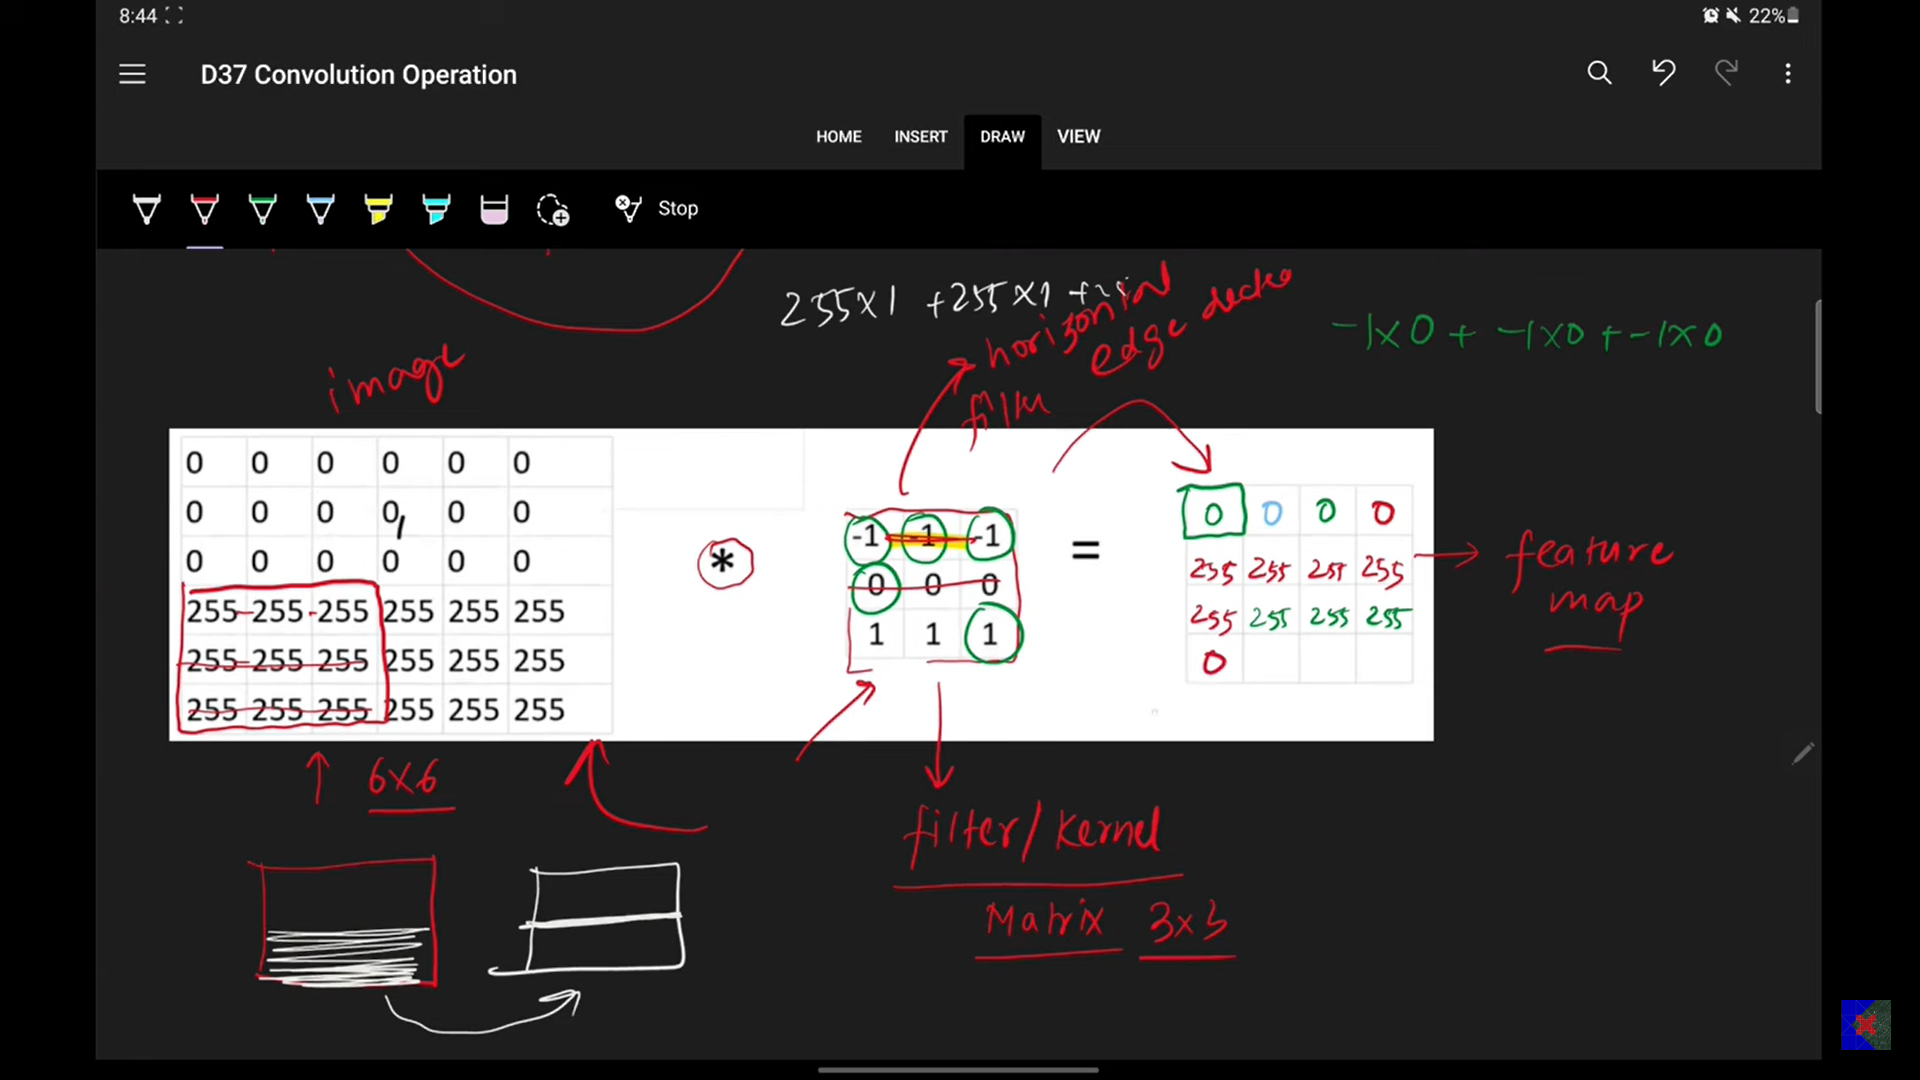

For vertical(filter) edge detector we multiply by:

[ -1 0 1 ]

[ -1 0 1 ]

[ -1 0 1 ]

But, in DL, we initialized filter by random value and our CNN do backpropagation through determine the value of filter. It is like weight in ANN.

if image (n * n) and filter (m * m) then ouput it give is ((n-m+1) * (n-m+1))

If in grayscale filter is 3 * 3 then in RGB 3 * 3 * 3 because each color has different different channel so n * n * 3. the feature map will be single channel in RGB.

pixel (n * n * c) * filter (n * n * c) = feature (n-m+1)(n-m+1)/single channel

Multiple filter:

Almost all the we apply multiple filter to get different features. So, each filter give seperate feature. It act as multiple channel to next convolution layer

# Padding and Strides

The problem with CNN is
- each time you apply filter, the size will keep on decreaseing . In short you will lose information.
- side part of image become less involve than middle part of image pixel during convolution. This means importance of side pixel will be less than middle. If the information is in side part then we may miss it.

These problem is slove by padding

**padding:**
In padding what we do is add extra pixel to all side (top, bottom, left, right) so, the size of the image wont shrink when applying filter and lost the imformation. padiing value is zero (also called zero padding)

n * n is image then (n+2p * n+2p) after padding if the filter is (m * m) then (n+2p-m +1 ) * (n+2p-m +1 )

Keras: has two: valid(no padding) and same(padding it will automatically adjust)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
# 32 = number of filter, kernel size= size of filter, padding = valid not extra padding is added
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Flatten()) # convert data to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
# 32 = number of filter, kernel size= size of filter, padding = same extra padding is added
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Flatten()) # convert data to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

**Strides**

move by 1 pixel then it is called stride=1

move one pixel to the right and one pixel to the bottom for convolution operation. This means (1,1) strides.

Now, n * n pixel image and m * m filter and has (s,s) stride and padding p then feature map will be:

floor operation. that means 1.9 is also 1 and 1.1 is also 1 : ((n +2p - m)/s)+1

As you increase the strides, your feature map size will decrease. you may lose some information.

if stride is greater than 1 then it called strided convolution

if filter size more that convolution then no operation is perform

Why use stride?
- high level features: when we donot wanr low levek features then we use
- computing: faster compution because less operation is need to be done



In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu', input_shape=(28,28,1)))
# 32 = number of filter, kernel size= size of filter, padding =same means 1 , strides (2,2) means move by 2 right and 2 bottom
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Flatten()) # convert data to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

# Pooling

The problem with Convolution:
1. Memory issue : imagine is 228 * 228 * 3 RGB image and applying 100 of filter(3,3)  this will create feature map (226 * 226) * 100. And we choose 32 bit floating value to store this. Then, (226 * 226) * 100 * 32 = 19.5 MB for one image. if we do batch 100 training image then it will take 1.5 GB. This will cause memory issue
2. Translation variance: feature will dependent on location. cat in right bottom conner is different then cat on the left top conner because it depend on location.

What we need is translation invariance. It should not depend of location of the object

Pooling is a way to down sample your feature map because of it feature become translation independent. It doesnot treat differently the object according to location.  

After convolution layer, we add pooling layer.

In feature map, we add non-linearity to make non-linear feature map. After this, we add pooling


Different types of pooling:
1. Max pooling
2. Mean
3. average
4. L2  
5. Global pooling

After conv, we have to tell 3 thing for pooling:

Let's:
1. Size of pooling : size = 2,2
2. stride : 2
3. type : max

then we pick 2 * 2 matrix from convoluted feature map and take out the maximum value among them. Then take it in new pooling feature map. we move by 2 strides and do same picking 2 * 2 matrix and select the max. We repeat this process and make new feature map pooled.  

What we are doing is in a small field we are picking the most dominent field. Internally, in a receptive field we are picking most doiminit. We can say we are eliminating the low level details and selecting high level details. Because of this, there comes translation invariance. this is how pooling works.

If you have multiple feature maps we apply pooling individual feature map and have multiple pooled map.

In pooling, we donot have trainable operator.


In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')) # we are doing max_pooling
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

**AvgPooling:**
we will calculate the average of pooling area or receptive field

**Global pooling:**
It is use in the end when you flatten it pass to fully connected layer, you can use in replacement of flatten. It is used to reduce overfitting.
It have two types: Global max and Global avg.

Global max pooling: it will take the value of entire featured map that come from covolution operation and select one max value from it and make 1 * 1 scalar value.

Global avg pooling : It will take the average of all the entire feature map and give only 1 ouput


Advantage:
- reduced size
- translation invariance: where is that feature doesnot matter feature is there matter.
- Enhanced features(only in case of Maxpooling): we pick small field called receptive field. In max pooling, we pick the most dominent among them. This make enhance
- No need of training: we only need to aggregated.

Disadvantage:

- image segmentation: where image need to in specific location.
- you lose alot of imformation.

# CNN Architecture

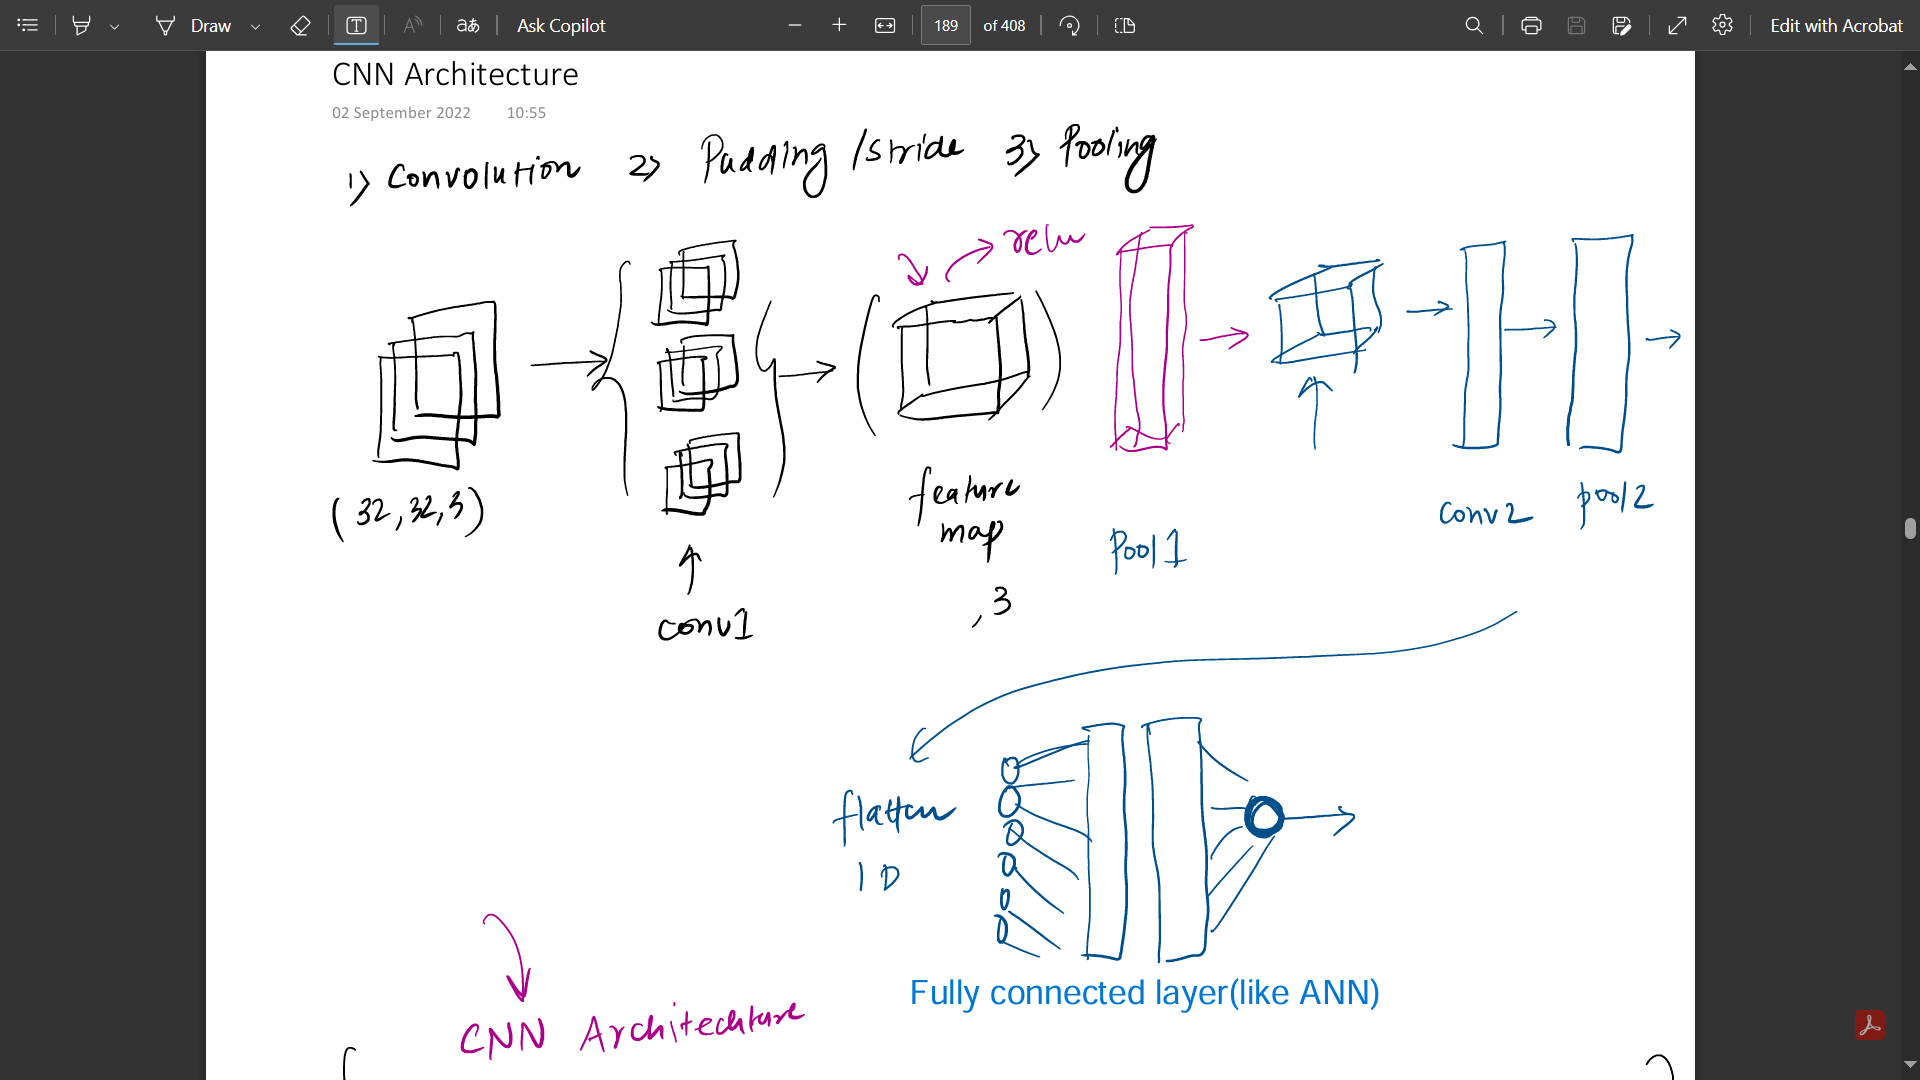

We pass image through convolution layer then pooling layer. we can again use con the pooling repeatedly. The tensor we get then, flatten. then it will pass to fully connected layer (ANN) and we get output.

**LeNET**


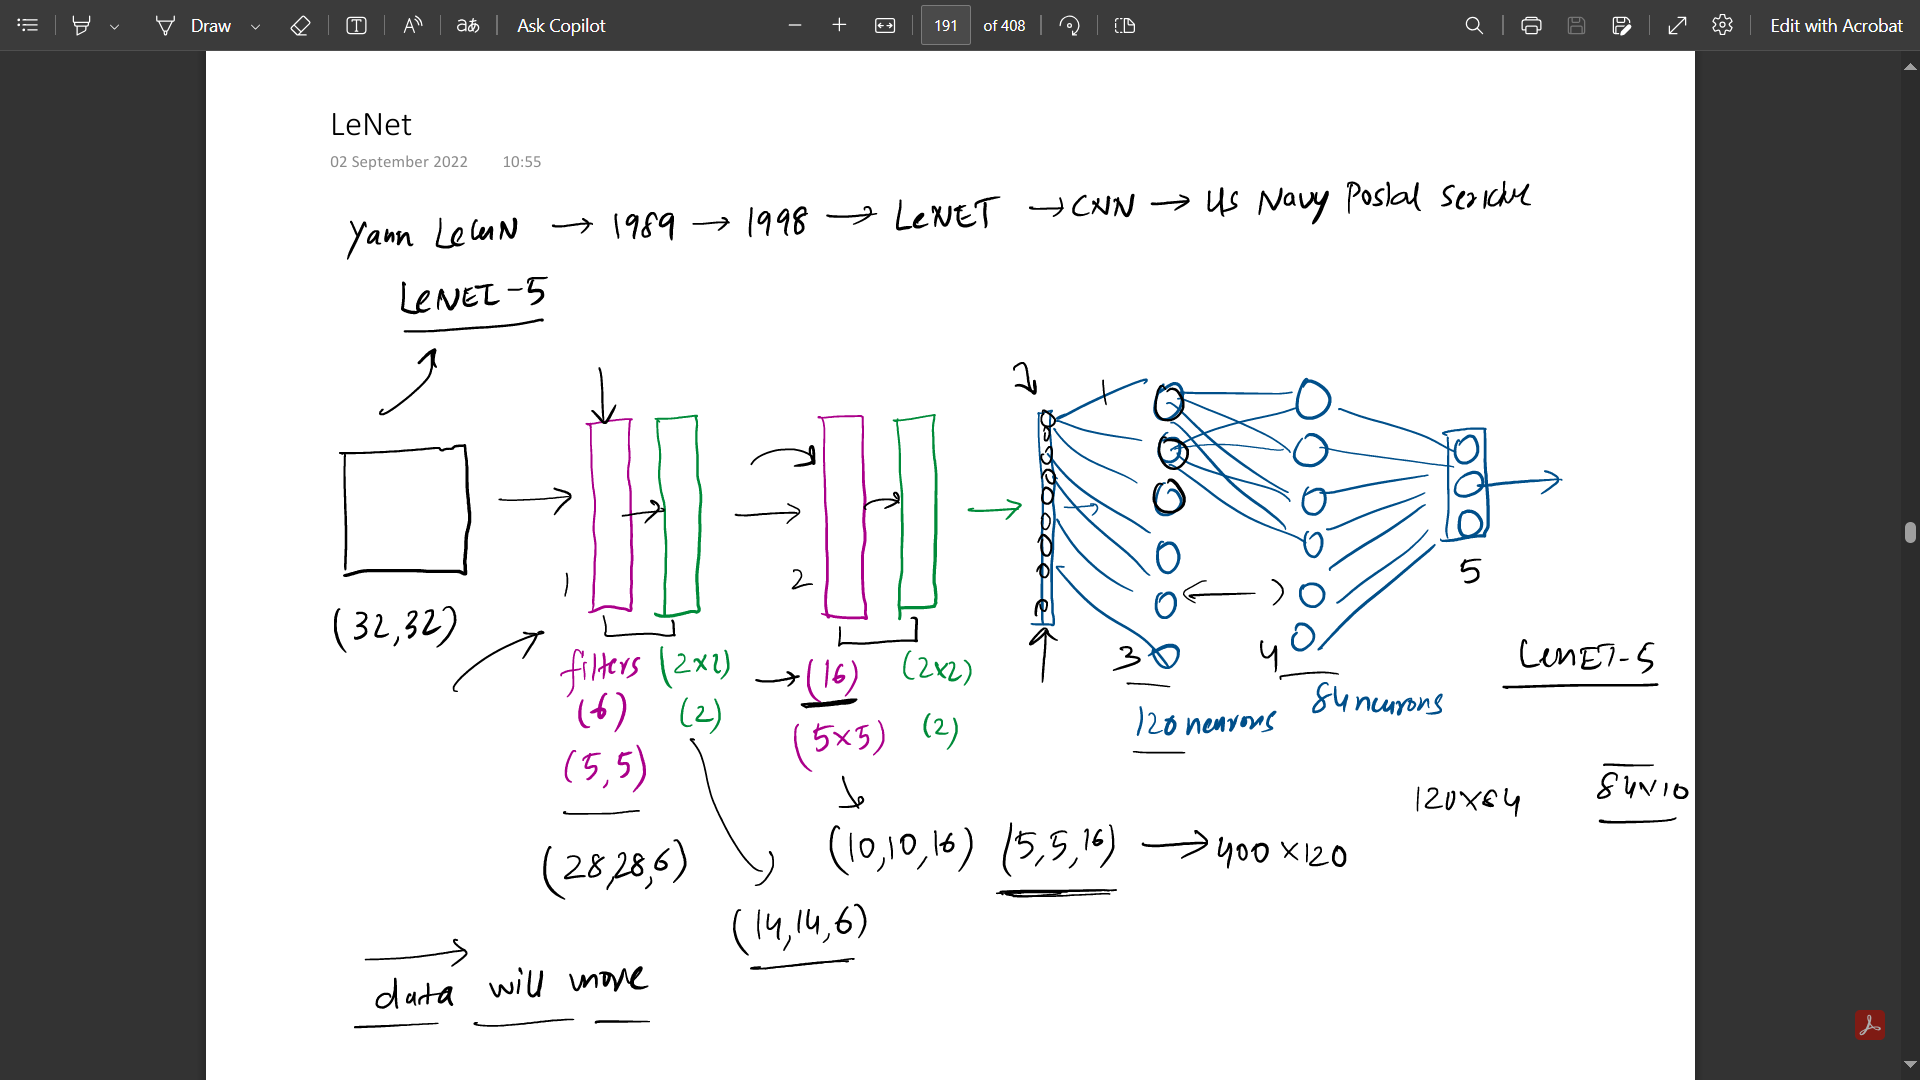

In [ ]:


model = Sequential()
#1
model.add(Conv2D(6, kernel_size=(5, 5), padding='valid', activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))
#2
model.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
#3
model.add(Dense(120, activation='tanh'))
#4
model.add(Dense(84, activation='tanh'))
#5
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

# CNN VS ANN

In ANN, we have weights and input multiple to reach the node and in the node we add bias. And then, we we use activtion function

Similary in CNN, filter act as weights and filter and input speficic get multiple with filter and bias is add then activation function is use.  

They both are alikes

In CNN, if the size of image is 128 * 128  RBG (128,128,3) and 50 filter of 3 * 3 (3,3,3) then the trainble parameters is 3 * 3 * 3 = 27 weights and multiple 50 filters = 1350 and plus 50 bias = 1400 trainable parameters. The total number of parameter doesnot change in the increase in size of image or image pixels. It remain same.

In ANN, increase in input increase the number of weights. weights = number of input* number of nodes. So, if number of weights increase then overfitting also increase.

# Backpropagation

Trainbale parameter in CNN is in filter and in fully connected (after flatten)

In one filter(W1) is 3 * 3, it has 3 * 3=9 weights and 1 bias. These give total 10 trainable parameter.

After pooling, it has (2,2) feature map then that gives 2 * 2=4 input for fully connected. 4 input and all connected to only one neuron then it have 4 weight and 1 bias. Total trainable parameter is 5

All together it have 10 + 5= 15trainable parameter.

**Logical flow**

If image is X. In X we do convolution operation with the help of filter W1 and b1 which gives us Z1.In this Z1 we apply relu this gives A1 (activation) and we do pooling in A1 gives P1. Then we flatten give F. F will be input do dot product to weights and add to bias give Z2. Then, Z2 is given activation function this give A2(our prediction). From A2 we calculate loss(L)

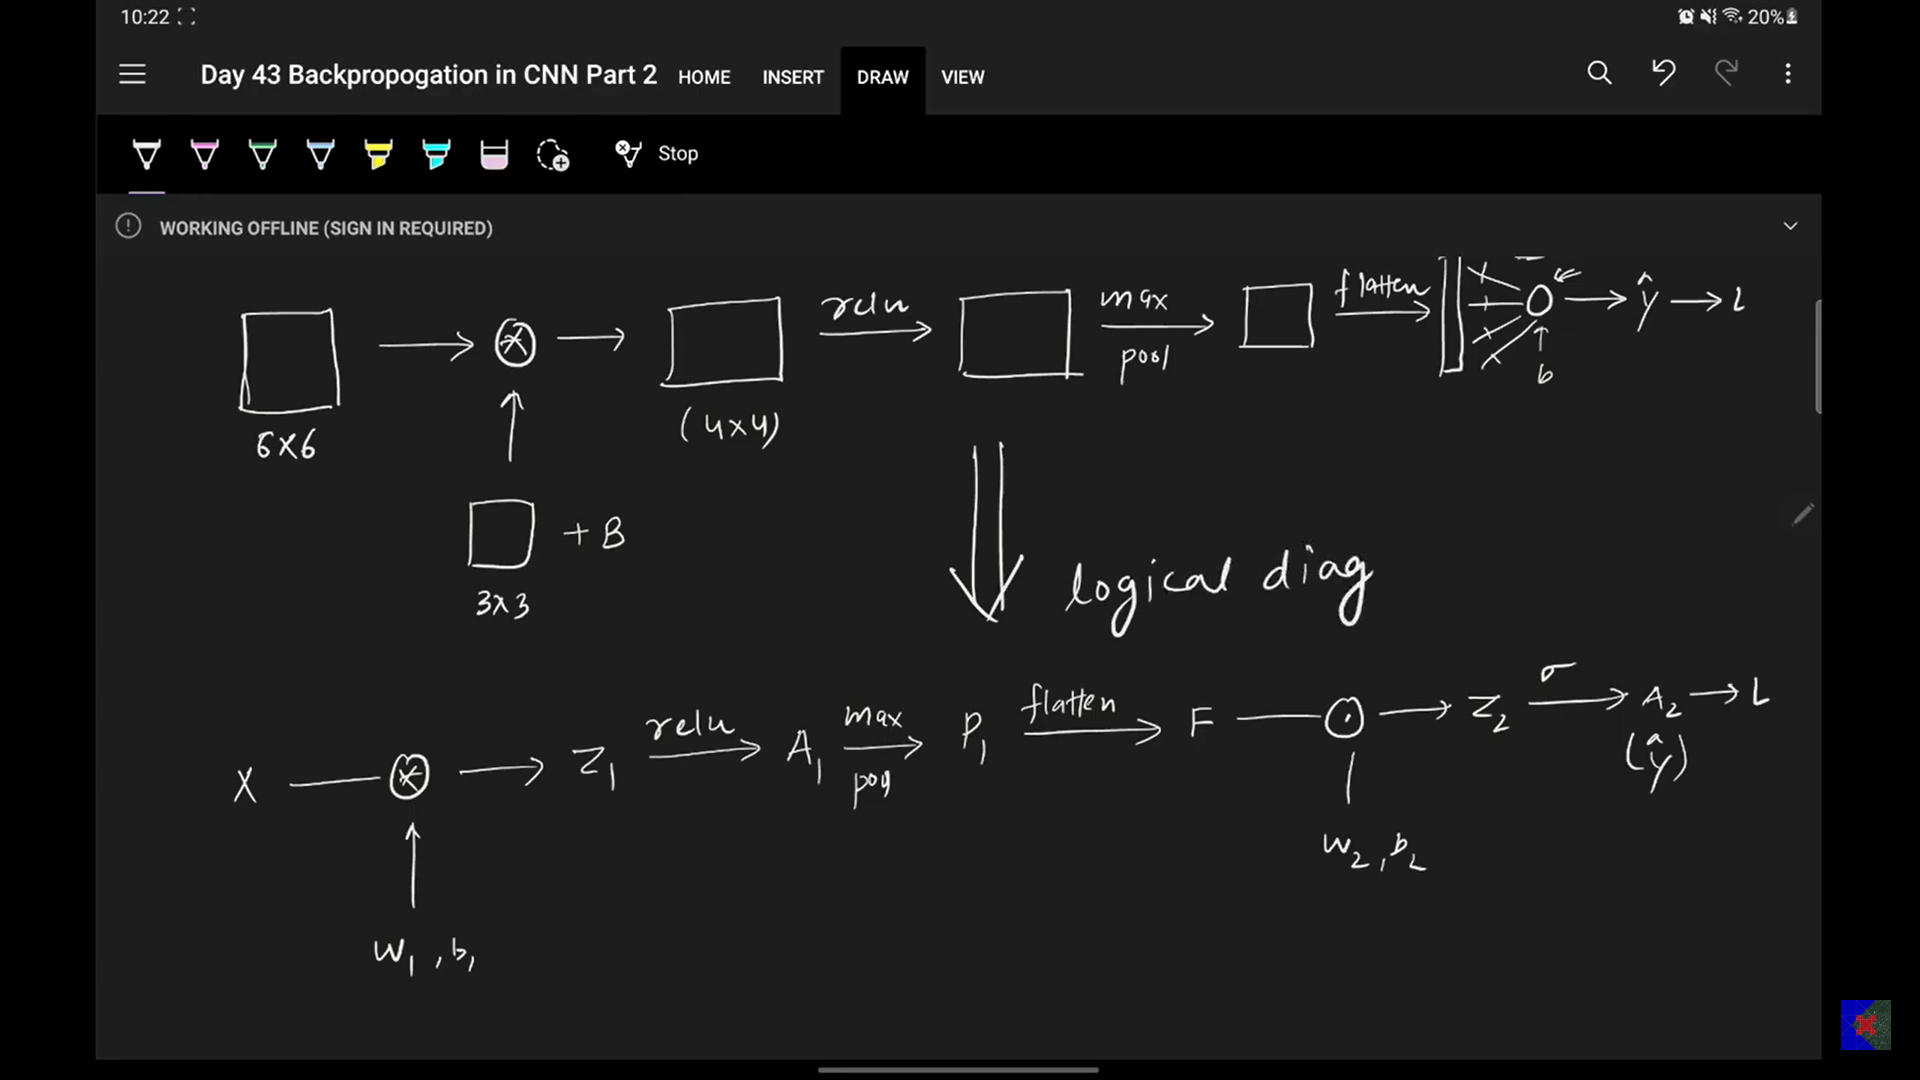

**Forward prop**

Z1= conv(X,W1) + b1

A1 = relu(Z1)

P1 = maxpool(A1)

F= flatten(P1)

Z2= W2F +b2

A2 = sigma(Z2)

**Backward prop**

Our end goal is to do gradient descent in trainable parameters and find the value where our loss is minimum.

Our objective:

W1 = W1 - lr (dL/dW1)

b1 = b1 - lr (dL/db1)

After flatten (ANN):

W2 = W2 - lr (dL/dW2)

b2 = b2 - lr (dL/db2)

We have to apply gradient descent till loss is minimized.

**After Flatten**

W2 = W2 - lr (dL/dW2)

b2 = b2 - lr (dL/db2)

dL/dW2= change in W2 can make how much change in L

since W2 is not directly connected to L. So, lets find out where the depend and how it connected:

dL/dW2 = dL/A2 . dA2/dZ2 . dZ2/dW2

dL/db2 = dL/A2 . dA2/dZ2 . dZ2/db2

**before Flatten**

dL/dW1 = dL/A2 . dA2/dZ2 . dZ2/dF . dF/dP1 . dP1/dA1 . dA1/dZ1 . dZ1/dW1

dL/db1 = dL/A2 . dA2/dZ2 . dZ2/dF . dF/dP1 . dP1/dA1 . dA1/dZ1 . dZ1/db1


dL/dW2 = dL/A2 . dA2/dZ2 . dZ2/dW2

dL/db2 = dL/A2 . dA2/dZ2 . dZ2/db2

to calculate:

dL/A2: we think in a singel image

L = -Yi log(a2) - (1-Yi) log(1-a2)

dL/a2 = d[-Yi log(a2) - (1-Yi) log(1-a2)]/da2

= (-Yi/a2) + (1-Yi)/(1-a2)

= a2-Yi/a2(1-a2)

dA2/dZ2:

A2 = sigmoid(Z2)

dA2/dZ2 = sigmoid(Z2)[1-sigmoid(Z2)] = a2[1-a2]

dZ2/dW2: for this Z2 = W2F+b2

dZ2/dW2  = F

dZ2/db2=1

Then,
dL/dW2 = [a2-Yi/a2(1-a2)] . a2(1-a2) . F

= (a2 - Yi)F = (A2-Y)F

Since, we need dL/dW2 shape (1,4) then, to make is 1,4 we need to tanspose F so, dL/dW2 = (A2-Y)transpose(F)

dL/A2= [a2-Yi/a2(1-a2)] . a2(1-a2) . 1

= (a2 - Yi) = (A2-Y)

For m image

dL/dW2 =(1/m) (A2-Y)transpose(F)

dL/b2 = (1/m)(A2-Y)




dL/dW1 = dL/A2 . dA2/dZ2 . dZ2/dF . dF/dP1 . dP1/dA1 . dA1/dZ1 . dZ1/dW1

dL/db1 = dL/A2 . dA2/dZ2 . dZ2/dF . dF/dP1 . dP1/dA1 . dA1/dZ1 . dZ1/db1

Now,

dZ2/dF = d(W2F + b2)/dF = W2

dF/dP1. Since F doesnot have trainable parameter we have change only shape during forward prop. So, in backprop also we need to do is reshape. dF/dP1 = reshape(P1.shape)

dP1/dA1. In max pooling we pick only one number each from several group. So, the upick have no role in Yhat only pick one have. We need to opposite operation here.

In our scenerio we have 4,4 matrix and use max pooling 2,2. Now, we need to know where was the location of the number of max pooling in activate output. We will make matrix of it and place it there and rest will be use 0. we are making 2,2 matrix to 4,4 matrix. We can say reverse of max-pooling.

We say:

    dL/A1= [dL/dP1xy,  if Amn is the max element

            0 , otherwise]

            xy for P and mn for A row,column


dA1/dZ1= {

  1 if Z1xy > 0

  0 if Z1xy < 0

}






    Z1 = [Z11 Z12]
         [Z21 Z22]

Z11 = X11 W11 + X12 W12 + X21 W21 + X22 W22 + b1

Z12 = so on

dL/db1 = dL/dZ1 * dZ1/db1

= dL/dZ11 . dZ11/db1 + dL/dZ12 . dZ21/db1 + dL/dZ21 . dZ21/db1 + dL/dZ22 . dZ22/db1

=dL/dZ11 + dL/dZ12 + dL/dZ21 + dL/dZ22

dL/dB1 = sum (dL/dZ1) -> scalar



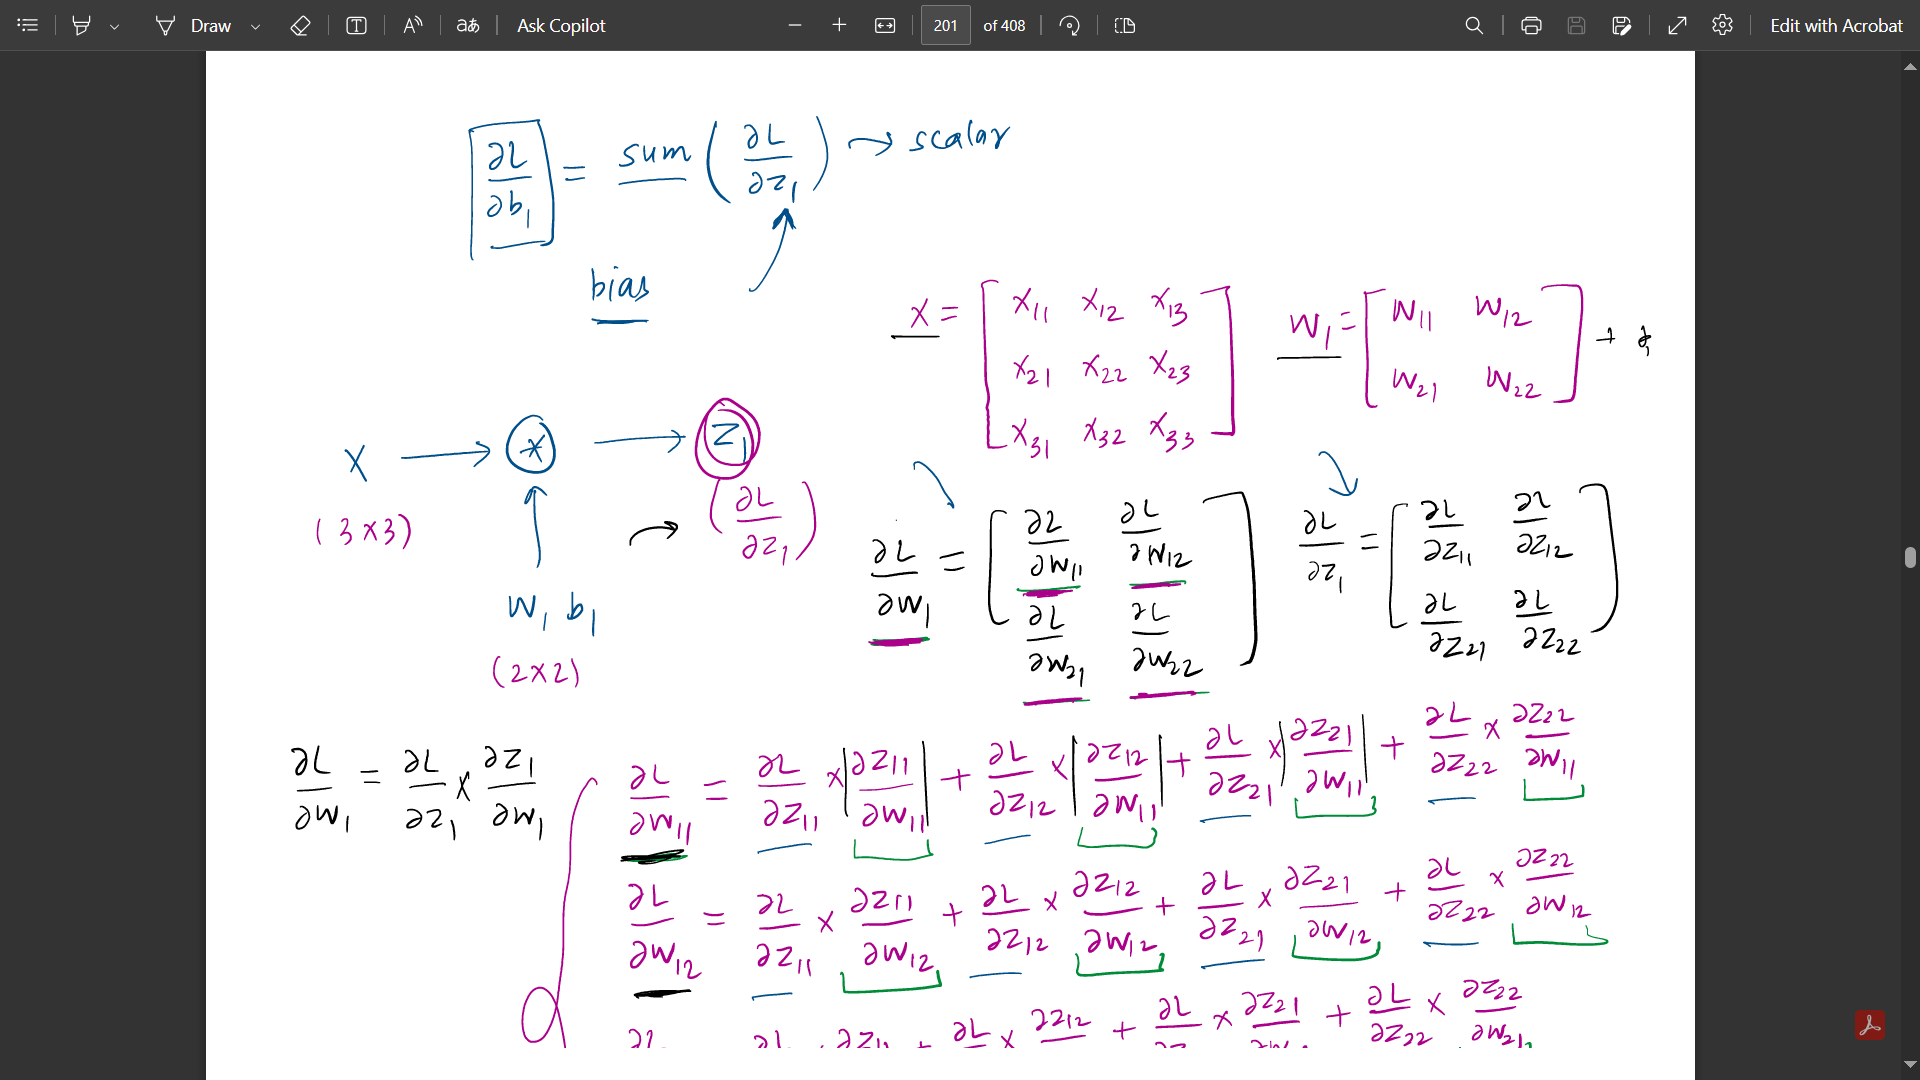

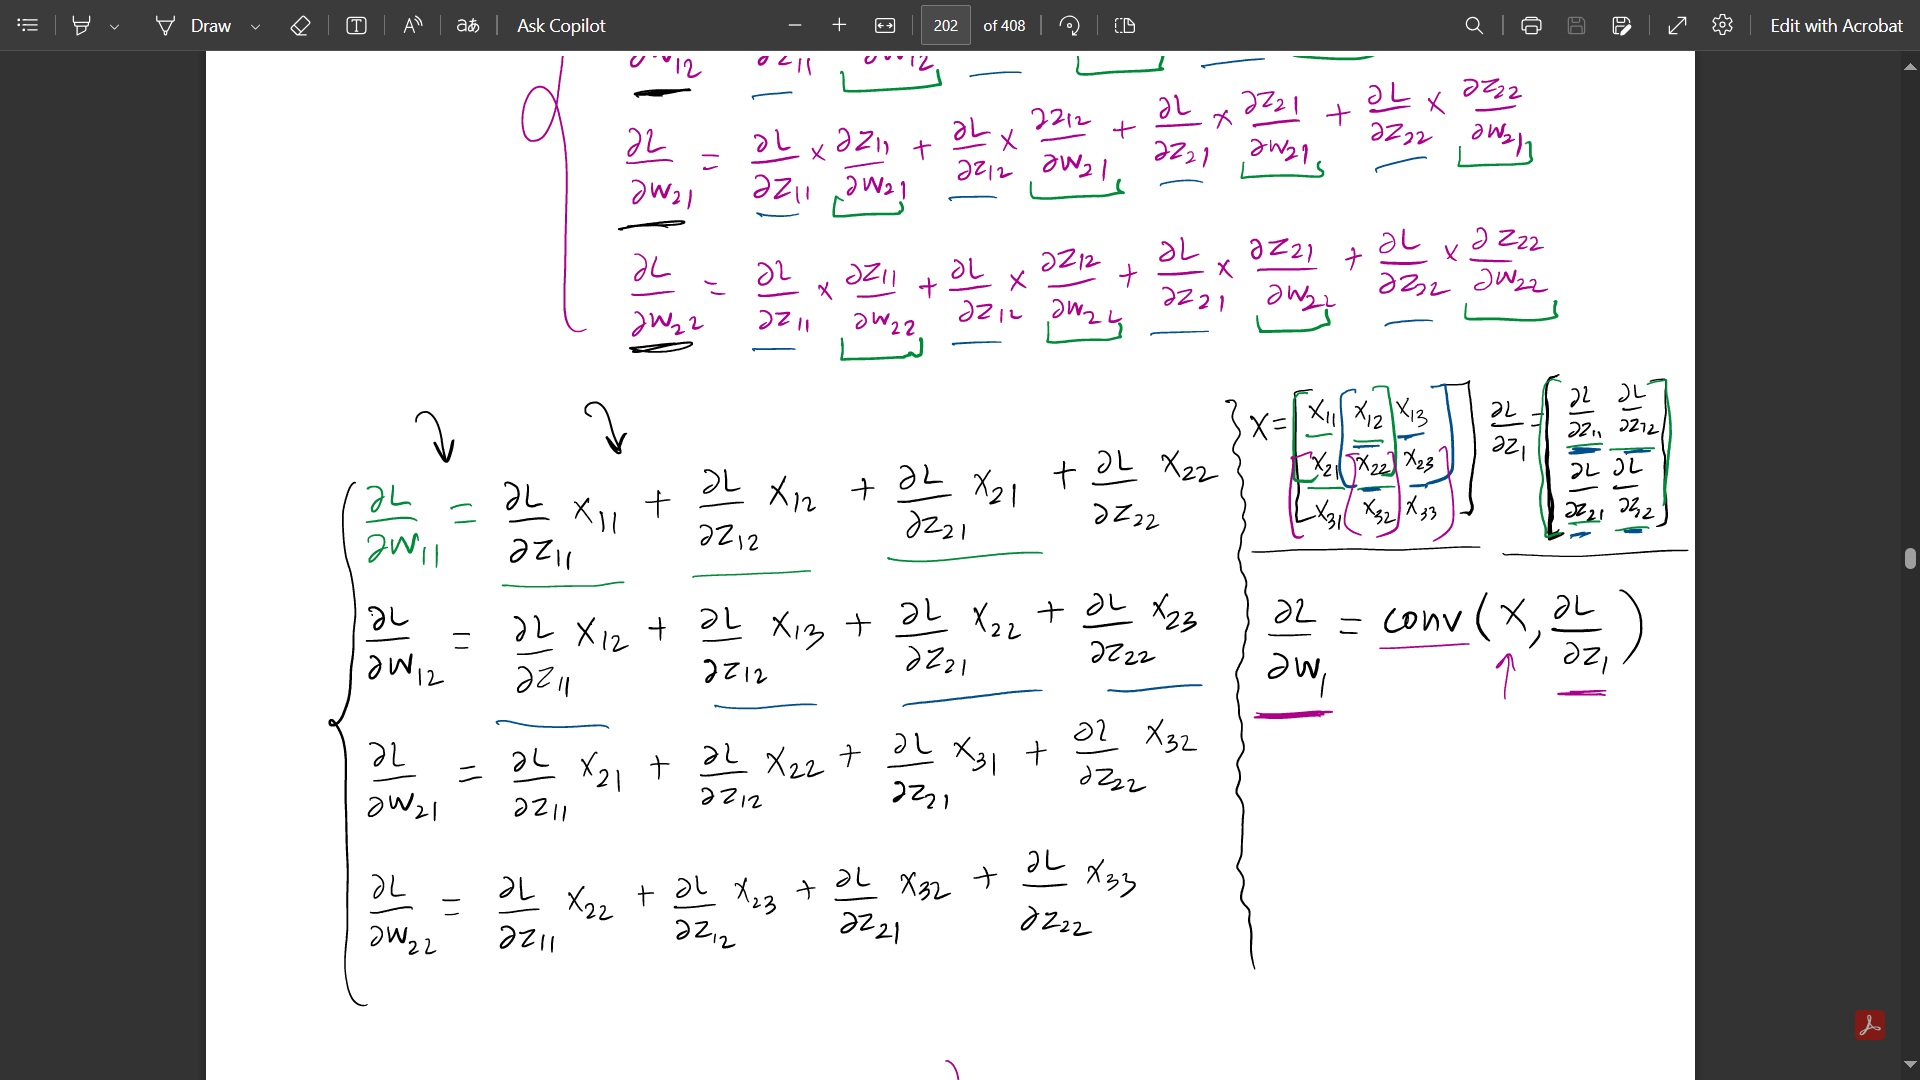

dL/ dW1 = conv(X, dL/dZ1)

dL/db1 = sum(dL/dZ1)

# PW(dog vs cat)

In [ ]:
# allow to use kaggle token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats # download data from kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 274MB/s]
100% 1.06G/1.06G [00:07<00:00, 150MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# batch norm
from keras.layers import BatchNormalization
#Dropout
from keras.layers import Dropout

In [ ]:
# keras use concept that called generator which will load data in batch
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', # it will assign cat 0 and dog 1
    batch_size=32,
    image_size=(256,256) #to make same size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int', # it will assign cat 0 and dog 1
    batch_size=32,
    image_size=(256,256) #to make same size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# image is store in numpy array
# problem is numpy array value is 0 to 255
# need to normalized 0 to 1
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 86ms/step - accuracy: 0.5551 - loss: 2.2885 - val_accuracy: 0.6528 - val_loss: 0.6159
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6699 - loss: 0.6099 - val_accuracy: 0.7408 - val_loss: 0.5402
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7498 - loss: 0.5169 - val_accuracy: 0.7672 - val_loss: 0.4932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.7648 - loss: 0.5195 - val_accuracy: 0.7886 - val_loss: 0.4626
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8210 - loss: 0.4032 - val_accuracy: 0.8060 - val_loss: 0.4218
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8533 - loss: 0.3384 - val_accuracy: 0.7836 - val_loss: 0.4708
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8865 - loss: 0.2781 - val_accuracy: 0.7422 - val_loss: 0.6668
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.9224 - loss: 0.1948 - 

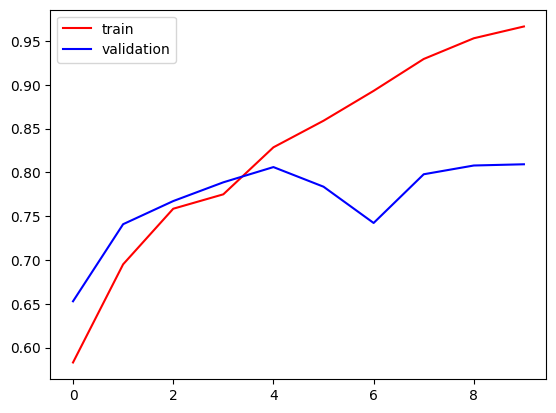

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

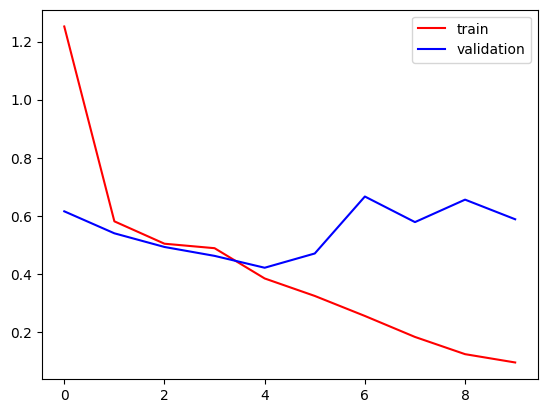

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# way to reduce overfitting

#add more add
#data Augmentation
#L1/L2 regularizer
#dropout
#batch Norm
#reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat4.jpeg')


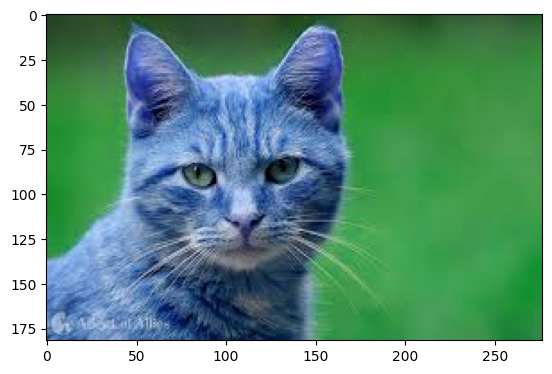

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img= cv2.resize(test_img, (256,256)) # resize the image
test_input = test_img.reshape((1,256,256,3)) # 1 in this batch means only 1 img we convert to 4D

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)

# Data Augmentation

Data Augmentation is a way of generating new data from old data.

More data more accuracy (good model)

Data Augementation use:
- generate data: clipping, rotating, zoom in and out etc
- reduce overfitting: it create more generalized image. If all image cat is look at right then model will think cat only look right. By using data augmentation we can create image of cat looking left.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/cat4.jpeg', target_size=(200,200))   # size need to 200,200

In [ ]:
import matplotlib.pyplot as plt

When you open in openCV is become numpy array. but here in image it is not numpy array

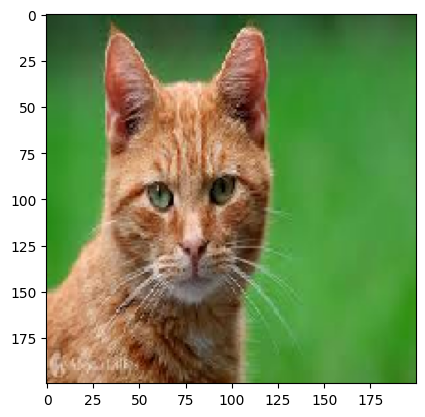

In [ ]:
plt.imshow(img)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'# when shifting sometime there is some gap. It fill it fill_mode is use nearest pixel image
    #fill_mode='reflect' # create it reflection
    #fill_mode='constant' # make black in gap
)

In [ ]:
img = image.img_to_array(img) #change to numpy

In [ ]:
img.shape

(200, 200, 3)

In [ ]:
input_batch = img.reshape((1,)+img.shape) # just 1 image batch

In [ ]:
i=0
# it create 10 image and save to dir = new
for output in datagen.flow(input_batch, batch_size=1, save_to_dir='/content/new'): # we use flow when we directly apply in image
  i=i+1 # create 1 batch
  if i ==10:
    break

we use flow from directory when we use all image at a time

In [ ]:
# this is a generator that will read pictures found in
#subfolders of 'data', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    '/content/train', # this is the target directory
    target_size=(256,256), # all images will be resized tp 256 * 256
    batch_size=32,
    class_mode='binary' # since we use this for binary_crossentropy loss, we need binary labels
)

(1, 200, 200, 3)

To train we use .fit_generator instead of .fit.

In [ ]:
model.fit_generator(
    train_generator, # this is not using orginal image but the new augmented image only
    steps_per_epoch=1000//batch_size, #the number of batches of data the generator should produce during each epoch
    epochs=10,
    validation_data=validation_generator,
    validation_steps=500//batch_size
)

# Pretrained model

Already made trained CNN model

**Why use pretrained models?**

1. for DL model to perform good it need lot of data. So we can get that from already pretrain model where we can have data with label.
2. Time: training model takes time. so, why no use aready train model


## ImageNET dataset

Visual database of image.

why this is made?

-> DL need data which is well-labeled

How it is made?
-> crowd sourcing

**ILSVRC**

Imagenet challenge -> it use subset of this dataset

2012- joffery hilton - model called alexNET IT is CNN model. It use GPU, relu and DL first time.

## AlexNET Architecture

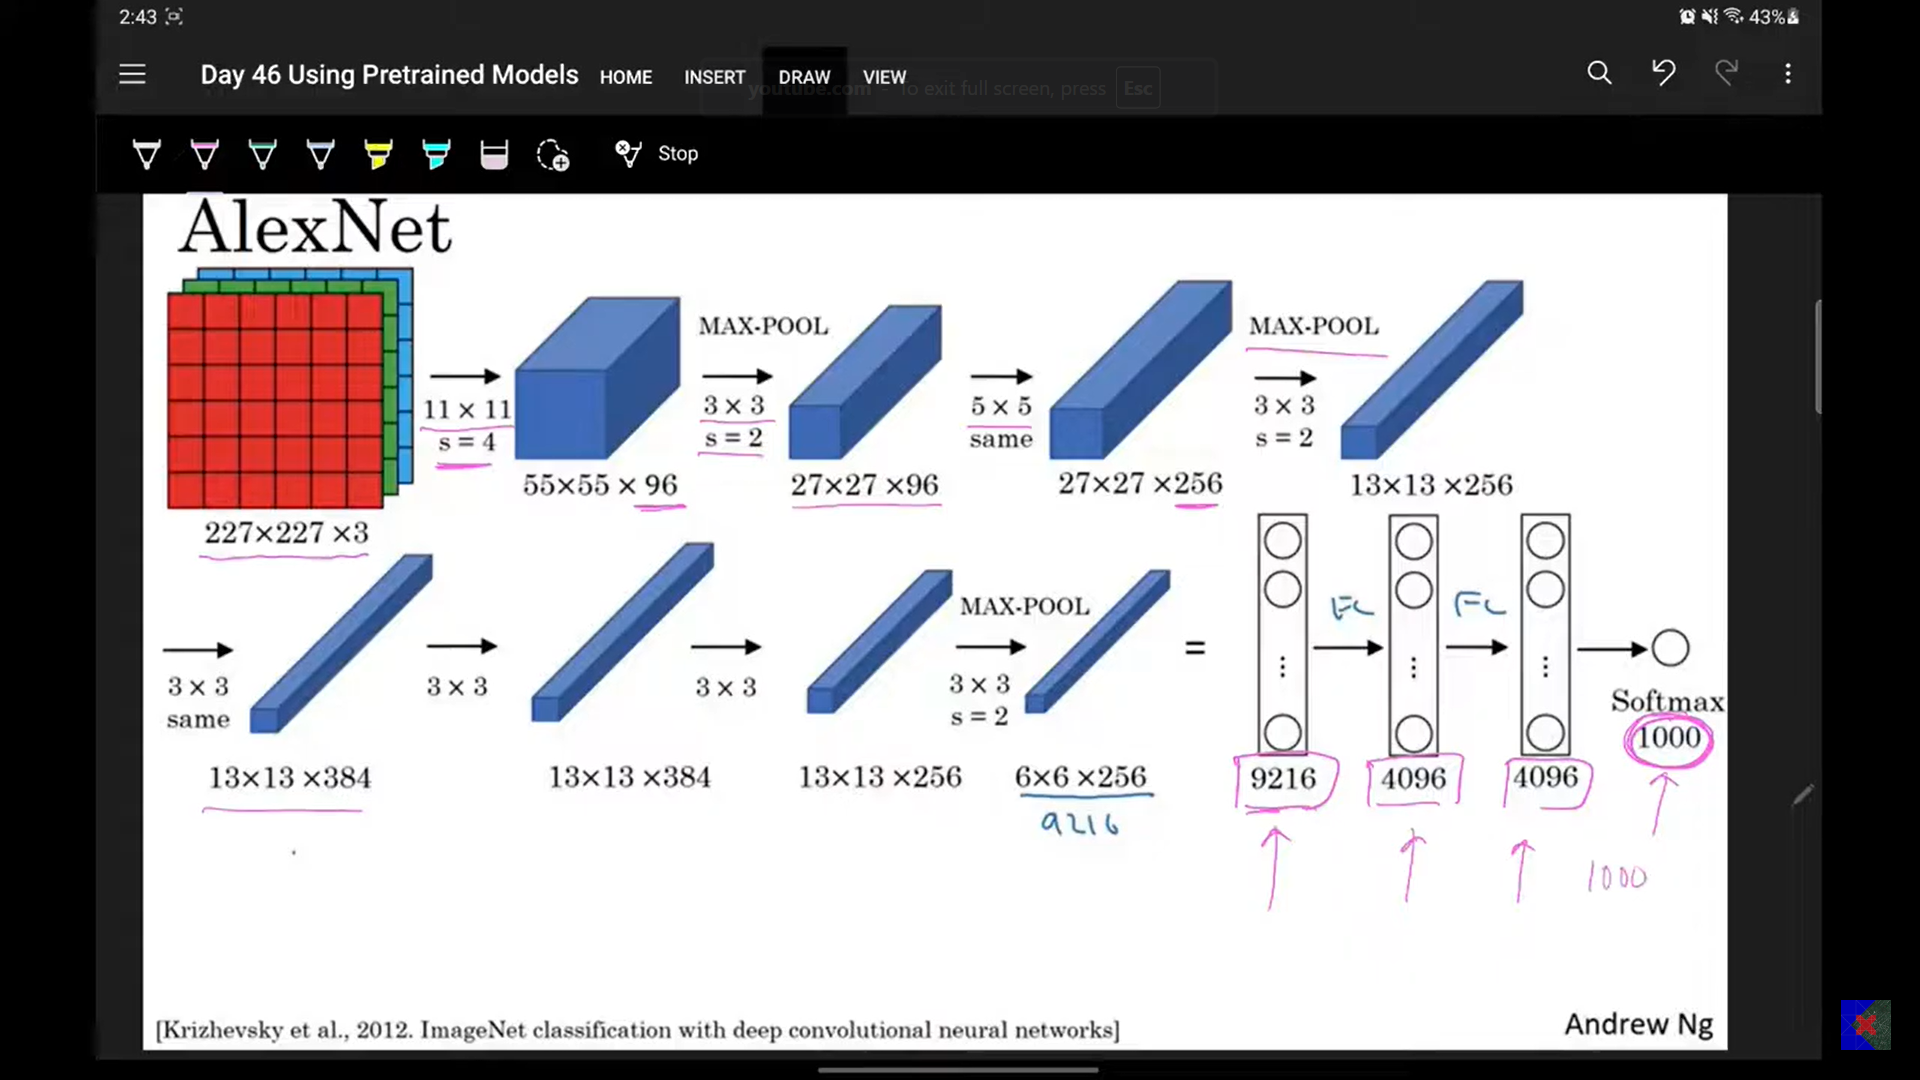

## Idea if pretrained model

If we have already model which is best because we donot need to worry about training and we donot need data. So why not directly use it.

https://keras.io/api/applications/ = pretrain model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 # using pretrain model resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
img_path='image' #giving image path
img=image.load_img(img_path,target_size=(224,224)) #loading image
x=image.img_to_array(img) #convert to array
x=np.expand_dims(x,axis=0) # convert to batch
x=preprocess_input(x) # now x has image

In [ ]:
preds= model.predict(x) #prediction
print('Predicted:',decode_predictions(preds,top=3)[0]) # this give top 3 prediction of image

# Transfer learning

problem with training your own model:
- data hungery: we may not have enough data
- take lot of time

So, solution is pretrained models because it have already learn

There also can occur problem in pretrained model. What if the model the you are working on doesnot know by pretrain model. for example you are clasifying: phone or tablet and you are using pretrain model which doesnot have train phone oe tablet data.

To solve this we use tranfer learning


**Transfer Learning:** a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

For example if you know how to ride cycle, you can learn easily  how to ride bike.

CNN has convolutional layer(convlution operation, pooling) and fully connected layers.

2D what is relation of the image is capture by convolution layers and fully connected part work is to classification.

In transfer learning, we take convolution layer only of already made model architecture and fully connected layer according our own choice of dense layer and neuron. We freeze the convolutio layer only. Because when we are training we train only fully connected layer, not convolution layer. We freeze so, it weights donot change.

**Why transfer learining works?**

Convolution layer work is to extract the features. Earlier layer of convolution to extract the primitive feature(like edges) which are generally same for all data and as we move forward we do more complex structure solve. Since Primitive feature are commom in all image data so, we use connvolution layer only and make our own FC layer.

**Ways of doing Transfer Learning**

1. feature extraction: We replaced FC layer and create our own FC layers. We feature extraction when there is already similar type of image data trained. For example if we are doing cat/dog classification we can use imageNET because animals data is already train in imageNET.So, we only need to change FC layers.


2. fine tuning: In fine tuning, we not only change FC layers, we also retrain even the last layers of convolution layers. Rest of convolution layers is freeze. When we need to do fine tuning?-> For example: We are training phone/tablet and we imagine that in imageNET there is no any these type of data train in imageNET. In this case, we use fine tuning. When our requriment not match with the image data train in it then we use fine tuning

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:08<00:00, 180MB/s]
100% 1.06G/1.06G [00:08<00:00, 130MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16 #pretrain model

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,# exclude FC layers
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# it doesnot have dense layer (FC)
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model = Sequential()

model.add(conv_base) # convolution layer of pertrain model(VGG16)
model.add(Flatten()) # add FC layer (dense layer)
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary() # in this summary we can see all are trainable parameter

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

**Feature extraction**

In [9]:
conv_base.trainable = False # with this we can make conv_base freeze

In [10]:
model.summary() # conv_base is not trainable

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Fine tuning**

In [11]:
conv_base.trainable = True

set_trainable = False

# we make last convolution layer trainable
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [12]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [13]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7815s 13s/step - accuracy: 0.8540 - loss: 0.3245 - val_accuracy: 0.9338 - val_loss: 0.1594
